<h1> $MID SEM$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import IPython
import sklearn
import seaborn as sns

In [2]:
file = open ('./adult.data','r')

In [3]:
def chr_int(a):
        if a.isnumeric():
            return int(a)
        else:
            return a
data=[]
for line in file:
        data1=line.split(',')
        if len(data1)==15:
            data.append([int(data1[0]),(data1[1]),
                        int (data1[2]), data1[3],
                        int (data1[4]), data1[5],
                        data1[6], data1[7], data1[8],
                        data1[9], int(data1[10]),
                        int(data1[11]),
                        int(data1[12]),
                        data1[13],data1[14],
                        ])

In [4]:
df=pd.DataFrame(data)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n


In [6]:
df.columns=['age','type_employer', 'fnlwgt',
            'education','education_num','marital status',
            'occupation','relationship','race',
            'sex','capital_gain', 'capital_loss', 
            'hr_per_week','country','income']

In [7]:
df

,age,type_employer,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n


<h1> a. To count the features of this dataset

In [8]:
df.count(axis=1)

0        15
1        15
2        15
3        15
4        15
         ..
32556    15
32557    15
32558    15
32559    15
32560    15
Length: 32561, dtype: int64

<h1> a) No. of Features = 15

<h1> To find fraction of data representing women with higher income

In [9]:
fm=df[(df.sex==' Female') & (df.income==' >50K\n')]

In [10]:
fm.count()

age               1179
type_employer     1179
fnlwgt            1179
education         1179
education_num     1179
marital status    1179
occupation        1179
relationship      1179
race              1179
sex               1179
capital_gain      1179
capital_loss      1179
hr_per_week       1179
country           1179
income            1179
dtype: int64

In [11]:
len(fm)

1179

In [12]:
len(df)

32561

In [13]:
len(fm)/len(df)

0.036208961641227236

<h1> b) The fraction of women with higher income in the dataset is $\sim$0.036209.

In [14]:
fm['age'].mean()

42.125530110262936

<h1> c) The mean age of women with income >50K is 42.1255.

<h1> d. Histogram for men vs their age who earn less or equal to 50K.

In [15]:
m = df[(df.sex==' Male') & (df.income==' <=50K\n')]

In [16]:
m1=m['age']

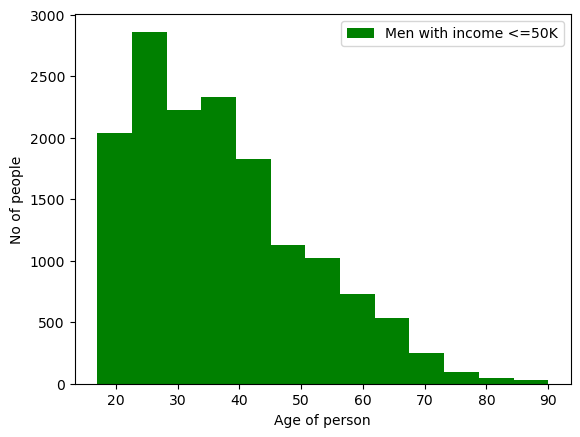

In [17]:
m1.hist(bins=13, color='green', grid=False, histtype='stepfilled', label='Men with income <=50K')
plt.xlabel("Age of person")
plt.ylabel("No of people")
plt.legend()
plt.show()

<h2> $\mathcal{The \; maximum \; number \; of \; men \; with \; income \; less \; than \; 50K \; are \; young \; adults \; of \; the \; age \;of\; 20-30 \;, \; men \;tend \;to \;gain \;wealth \;after \; they \;hit \; their \; 40s. }$

<h1> Boxplot for age in the data.

In [18]:
d1=df['age']

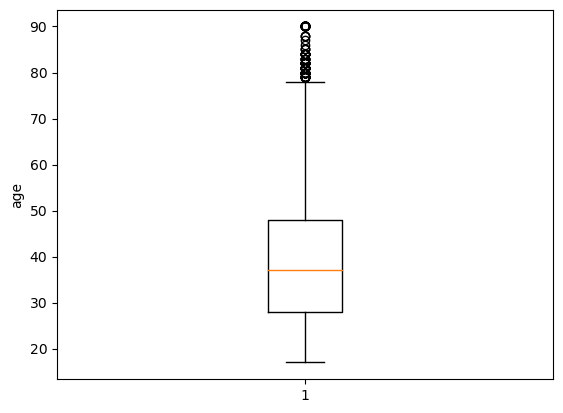

In [19]:
plt.boxplot(d1)
plt.ylabel('age')
plt.show()

<h2> $\mathcal{We \; can \; see \; from \;the boxplot \; that \; most \; of \; the \; people \; in \; the \; data \; are \; 30-50 \; years \; old \; the \; average \; age \; of \; the \; people \; surveyed \; is \; around \; 35-40 \; whereas \; there \; are \; also \; some \; outliers \; 80+ \; years \; old \; in \; the \; dataset.}$